In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, density=1, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=(n_samples, n_samples*density), random_state=seed, noise=0.0)
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
densities = list(range(1, 11, 1))
twoMoons_datasets = [
    [make_moons_random_assignment(100, density=density, seed=seed) for seed in random_seeds]
    for density in densities
]

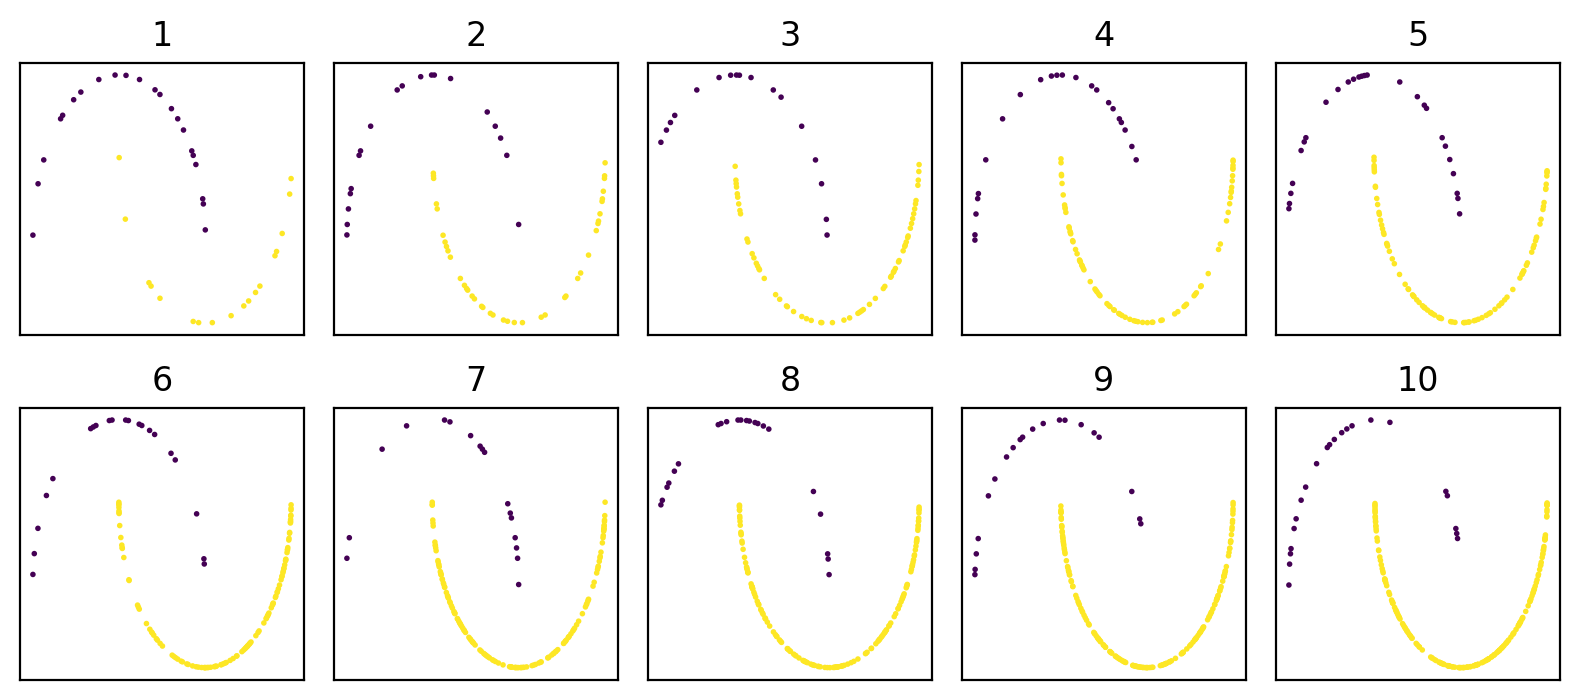

In [4]:
import matplotlib.pyplot as plt
from src.utils.data import sample_datasets
from src.utils.plots import plot_datasets

twoMoons_datasets_sampled = sample_datasets(twoMoons_datasets, lambda X, l: (X[::5], l[::5]))
plot_datasets(twoMoons_datasets_sampled, densities, n_cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_density_data.png", bbox_inches="tight", pad_inches=0)

In [11]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df, SELECTED_METRICS

selected_metrics_ = SELECTED_METRICS.copy()

densities_string = [f"1:{density}" for density in densities]

eval_results = cache(
    "TwoMoons_density",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, densities_string],
    recalc=False,
)

# selected_metrics_.remove("S_DBW")
# selected_metrics_.remove("CVNN")

df = create_and_rescale_df(eval_results, selected_metrics=selected_metrics_)

In [12]:
# import pandas as pd
# df_nonscaled = pd.DataFrame(eval_results)

# df_nonscaled.groupby(["dataset", "measure"]).value.mean().to_latex("densities.tex")
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").mean().to_latex("densities_mean.tex")
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").min().to_latex("densities_min.tex")
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").max().to_latex("densities_max.tex")

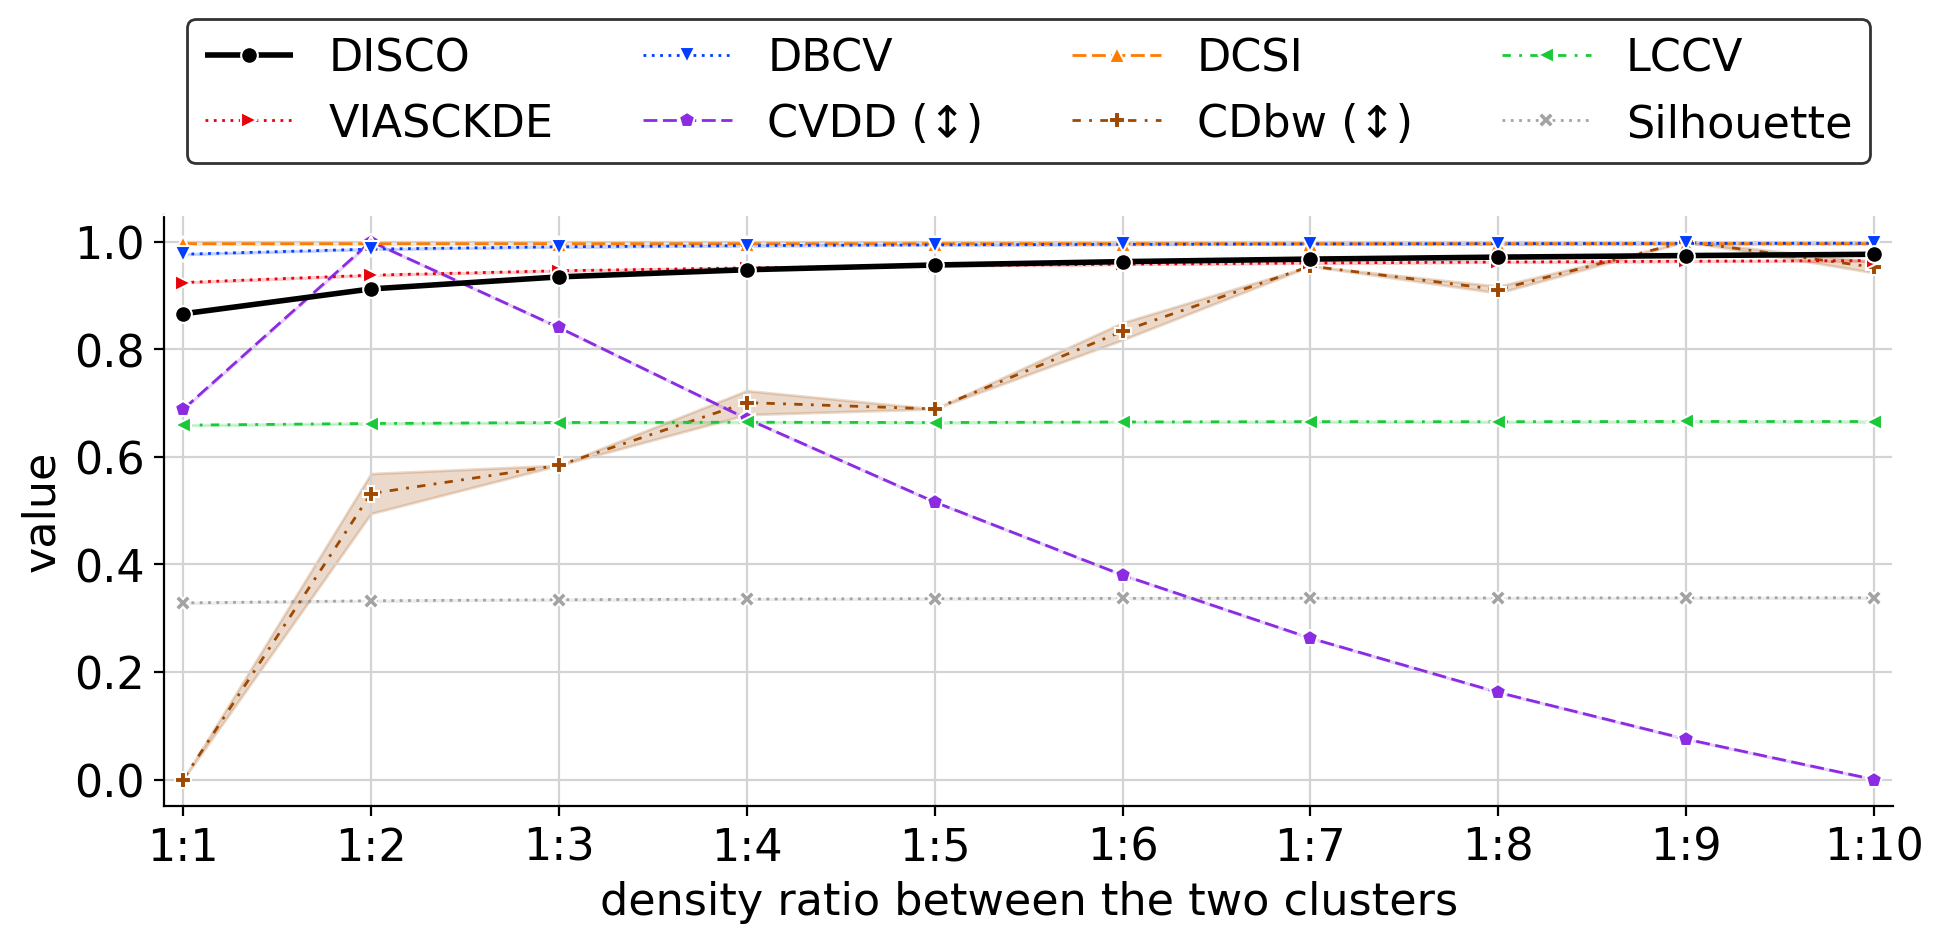

In [16]:
from src.utils.plots import plot_lineplot, GRAY
import seaborn as sns

eps = 0.1
x_range = densities[0] - 1 - eps, densities[-1] - 1 + eps

fig = plot_lineplot(
    df,
    "dataset",
    "value",
    "measure",
    x_range=x_range,
    x_label="density ratio between the two clusters",
    y_range=(None, None),
    figsize=(10, 5),
    palette=["black"] + sns.color_palette("bright")[:6] + [GRAY],
)
ax = fig.gca()
# ax.set_xticks(range(0, 16, 3))
plt.savefig("imgs/TwoMoons_density.png", bbox_inches="tight", pad_inches=0)